In [1]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class LinearRegression(d2l.Module):
  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.LazyLinear(1)
    
    self.net.weight.data.normal_(0, 0.01)
    self.net.bias.data.fill_(0)

In [3]:
@d2l.add_to_class(LinearRegression)
def forward(self, X):
  return self.net(X)

In [5]:
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
  fn = nn.MSELoss()
  return fn(y_hat, y)

In [6]:
@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

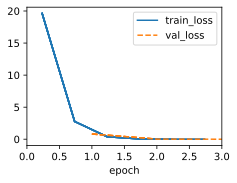

In [7]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [8]:
@d2l.add_to_class(LinearRegression)  #@save
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([-0.0047, -0.0168])
error in estimating b: tensor([0.0122])


### Exercises

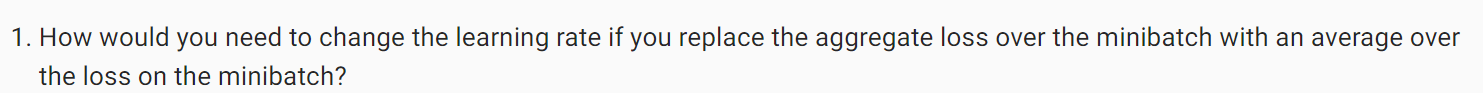

To maintain identical weight updates when switching from a Sum Loss to a Mean Loss, you must scale your learning rate by the batch size ($N$).The RelationshipIf $L_{sum} = \sum \ell_i$ and $L_{avg} = \frac{1}{N} \sum \ell_i$, then:$$\nabla L_{avg} = \frac{1}{N} \nabla L_{sum}$$The Update RuleTo keep the weight update $\Delta w$ the same:$$\Delta w = \eta_{sum} \nabla L_{sum} = \eta_{avg} \nabla L_{avg}$$Substituting the gradient relationship:$$\eta_{sum} \nabla L_{sum} = \eta_{avg} \left( \frac{1}{N} \nabla L_{sum} \right)$$The Conclusion$$\eta_{avg} = \eta_{sum} \cdot N$$Summary: Multiply the learning rate by $N$ when moving from sum to average loss.

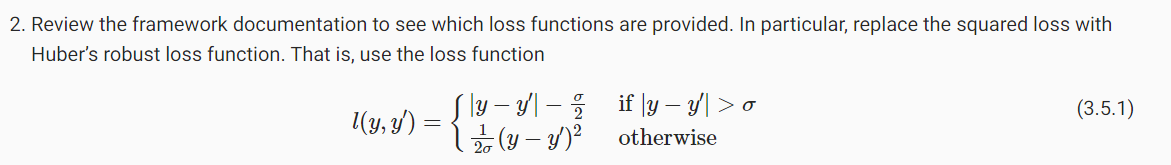

In [9]:
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
  fn = nn.HuberLoss()
  return fn(y_hat, y)

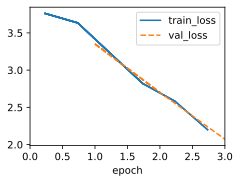

In [14]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

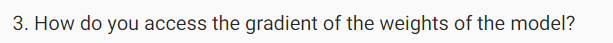

In [23]:
for name, param in model.named_parameters():
  print("name: ", name)
  print("grad: ", param.grad)
  print(" ")

name:  net.weight
grad:  tensor([[-0.1728,  0.5559]])
 
name:  net.bias
grad:  tensor([-0.7068])
 


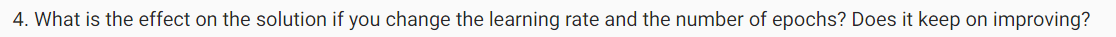

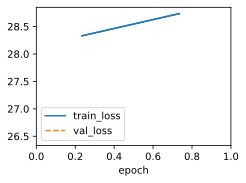

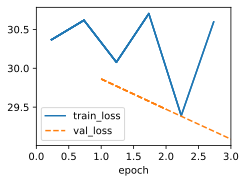

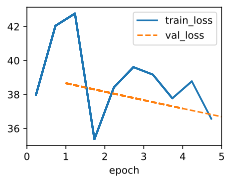

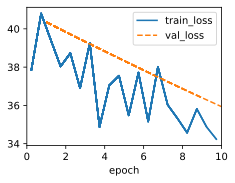

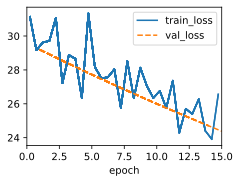

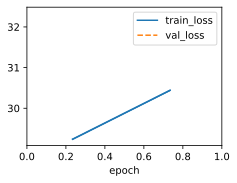

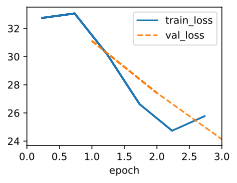

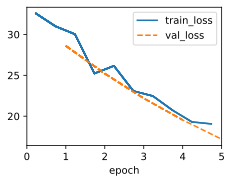

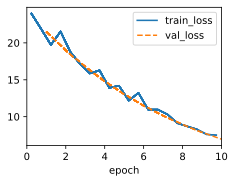

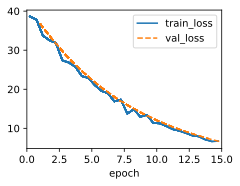

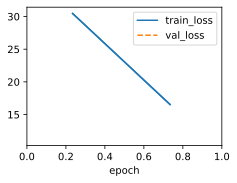

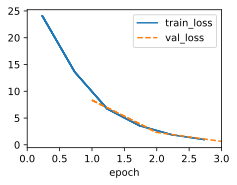

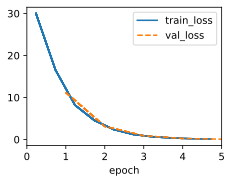

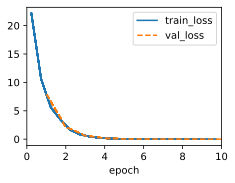

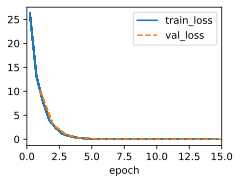

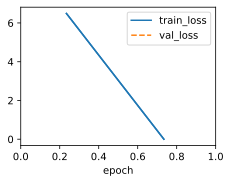

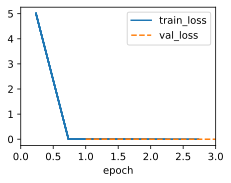

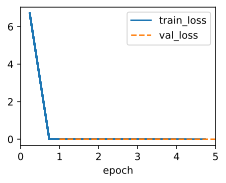

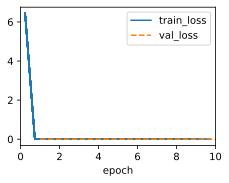

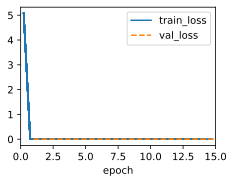

In [48]:
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
  fn = nn.MSELoss()
  return fn(y_hat, y)

num_of_epochs = torch.tensor([1, 3, 5, 10, 15])
learning_rates = torch.tensor([0.0001, 0.001, 0.01, 0.1])

results = torch.zeros((len(learning_rates), len(num_of_epochs)))

for i, lr in enumerate(learning_rates):
  for j, epochs in enumerate(num_of_epochs):
    model = LinearRegression(lr=lr)
    data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
    trainer = d2l.Trainer(max_epochs=epochs)
    trainer.fit(model, data)
    
    X_test, y_test = data.val_dataloader().dataset[:]
    y_hat = model(X_test)
    loss_val = model.loss(y_hat, y_test)
    results[i][j] = loss_val

In [54]:
idx = results.argmin()
row = idx // results.shape[1]
col = idx % results.shape[1]

min_value = results[row, col]

print(f"lr: {learning_rates[row]}, epochs: {num_of_epochs[col]}, min: {min_value}")

lr: 0.10000000149011612, epochs: 15, min: 9.490976663073525e-05


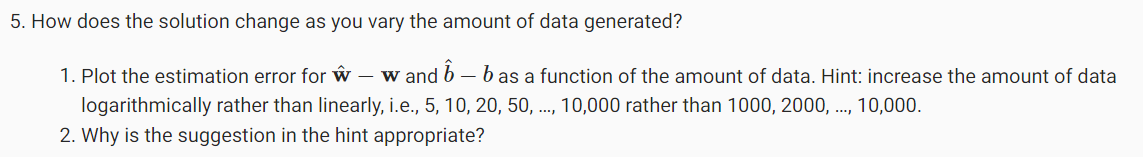

In [63]:
import numpy as np

def generate_125_scale(stop_at):
    # The base pattern
    pattern = np.array([1, 2, 5])
    sequence = []
    exponent = 0
    
    while True:
        # Scale the pattern by current power of 10
        current_decade = pattern * (10**exponent)
        for val in current_decade:
            if val > stop_at:
                return np.array(sequence)
            if val >= 5: # Start at 5 as per your request
                sequence.append(val)
        exponent += 1

data_sizes = generate_125_scale(10000)
print(data_sizes)

[    5    10    20    50   100   200   500  1000  2000  5000 10000]


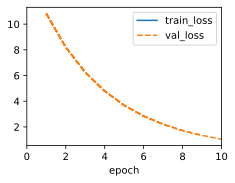

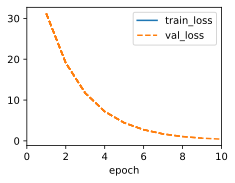

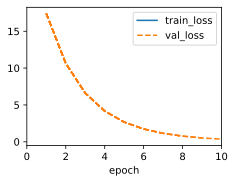

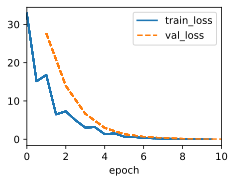

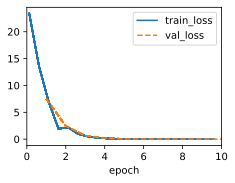

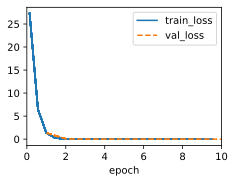

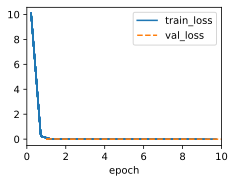

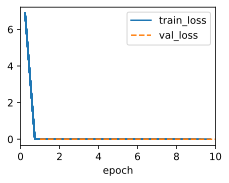

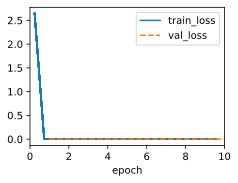

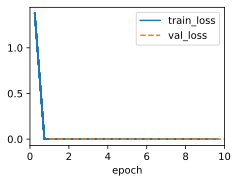

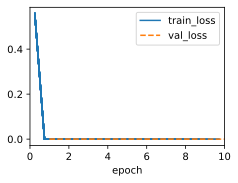

In [65]:
results = torch.zeros(len(data_sizes))

for i, n in enumerate(data_sizes):
  model = LinearRegression(lr=0.1)
  data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, num_train=n, num_val=n)
  trainer = d2l.Trainer(max_epochs=10)
  trainer.fit(model, data)
  
  X_test, y_test = data.val_dataloader().dataset[:]
  y_hat = model(X_test)
  loss_val = model.loss(y_hat, y_test)
  results[i] = loss_val

In [66]:
for i, val in enumerate(results):
  print(f"for n = {data_sizes[i]}: loss = {val}")

for n = 5: loss = 1.04678213596344
for n = 10: loss = 0.4238665997982025
for n = 20: loss = 0.3541550934314728
for n = 50: loss = 0.032817043364048004
for n = 100: loss = 0.00023888323630671948
for n = 200: loss = 0.00011172323138453066
for n = 500: loss = 8.957363752415404e-05
for n = 1000: loss = 9.924430924002081e-05
for n = 2000: loss = 0.0001027817779686302
for n = 5000: loss = 9.910100197885185e-05
for n = 10000: loss = 0.00010233900684397668


So, we can see that adding more data causes decreasing of the loss